In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

5


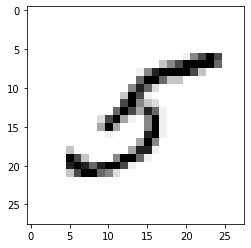

In [2]:
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [3]:
print(y_train[:image_index + 1])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5]


In [4]:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train/255
x_test = x_test/255

In [5]:
from keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))

In [7]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [8]:
model.add(Dropout(0.25))

In [9]:
model.add(Flatten())

In [10]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
# model.compile(loss='sparse_categorical_crossentropy',
#       optimizer='adam',
#       metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [12]:
batch_size = 128
epochs = 10

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Epoch 1/10
469/469 [==============================] - 114s 244ms/step - loss: 0.2455 - accuracy: 0.9240 - val_loss: 0.0544 - val_accuracy: 0.9843
Epoch 2/10
469/469 [==============================] - 155s 330ms/step - loss: 0.0883 - accuracy: 0.9744 - val_loss: 0.0386 - val_accuracy: 0.9874
Epoch 3/10
469/469 [==============================] - 123s 263ms/step - loss: 0.0660 - accuracy: 0.9803 - val_loss: 0.0336 - val_accuracy: 0.9891
Epoch 4/10
469/469 [==============================] - 89s 191ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0330 - val_accuracy: 0.9886
Epoch 5/10
469/469 [==============================] - 83s 176ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0312 - val_accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 81s 173ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0298 - val_accuracy: 0.9906
Epoch 7/10
469/469 [==============================] - 80s 171ms/step - loss: 0.0373 - accuracy: 0.9878 - val_loss: 0.0296 - val